In [2]:
import torch
import pandas as pd
import numpy as np

In [3]:
names = pd.read_csv("https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt")
names = names.values
names = names.reshape(1,-1).squeeze()
names

array(['olivia', 'ava', 'isabella', ..., 'zyrie', 'zyron', 'zzyzx'],
      shape=(32032,), dtype=object)

In [4]:
b = {}

for name in names:
    chs = ["<S>"] + list(name) + ["<E>"]
    for chs1, chs2 in zip(chs, chs[1:]):
        temp_tuple = chs1, chs2
        b[temp_tuple] = b.get(temp_tuple, 0) + 1

b

{('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('a', '<E>'): 6639,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('<S>', 'e'): 1530,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,
 ('g', 'a'): 330,
 ('a', 'i'): 1650,
 ('i', 'l'): 1345,

In [5]:
sorted(b.items(), key=lambda x: -x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6639),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2589),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1530),
 (('j', 'a'), 1473),
 (

In [6]:
next(iter(b.items()))[1]

394

In [7]:
cnt_table =torch.zeros((27,27)).type(torch.int32)

stoi = sorted(set("".join(names)))
stoi = {let: i for i, let in enumerate(stoi, start=1)}

stoi["."] = 0


for name in names:
    chs = ["."] + list(name) + ["."]
    for chs1, chs2 in zip(chs, chs[1:]):
        chs1_idx = stoi[chs1]
        chs2_idx = stoi[chs2]
        cnt_table[chs1_idx, chs2_idx] += 1
    

cnt_table

tensor([[   0, 4410, 1306, 1542, 1690, 1530,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6639,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [8]:
itos = {num: let for let, num in stoi.items()}


cnt_table_pd = pd.DataFrame(cnt_table)
cnt_table_pd["lets"] = ["."] + list(stoi.keys())[:-1]
cnt_table_pd.set_index("lets", inplace=True)
cnt_table_pd.rename(columns=itos, inplace=True)
cnt_table_pd

,.,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
lets,,,,,,,,,,,,,,,,,,,,,
.,0,4410,1306,1542,1690,1530,417,669,874,591,...,92,1639,2055,1308,78,376,307,134,535,929
a,6639,556,541,470,1042,692,134,168,2332,1650,...,60,3264,1118,687,381,834,161,182,2050,435
b,114,321,38,1,65,655,0,0,41,217,...,0,842,8,2,45,0,0,0,83,0
c,97,815,0,42,1,551,0,2,664,271,...,11,76,5,35,35,0,0,3,104,4
d,516,1303,1,3,149,1283,5,25,118,674,...,1,424,29,4,92,17,23,0,317,1
e,3983,679,121,153,384,1271,82,125,152,818,...,14,1958,861,580,69,463,50,132,1070,181
f,80,242,0,0,0,123,44,1,1,160,...,0,114,6,18,10,0,4,0,14,2
g,108,330,3,0,19,334,1,25,360,190,...,0,201,30,31,85,1,26,0,31,1
h,2409,2244,8,2,24,674,2,2,1,729,...,1,204,31,71,166,39,10,0,213,20


<Axes: ylabel='lets'>

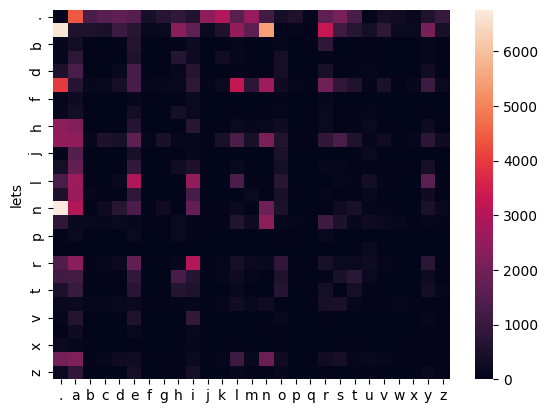

In [9]:
import seaborn as sns

sns.heatmap(cnt_table_pd)

In [10]:
cnt_table_pd.iloc[0,:]

.       0
a    4410
b    1306
c    1542
d    1690
e    1530
f     417
g     669
h     874
i     591
j    2422
k    2963
l    1572
m    2538
n    1146
o     394
p     515
q      92
r    1639
s    2055
t    1308
u      78
v     376
w     307
x     134
y     535
z     929
Name: ., dtype: int32

In [11]:
p = torch.from_numpy(cnt_table_pd.iloc[0].values).float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0185, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

<BarContainer object of 27 artists>

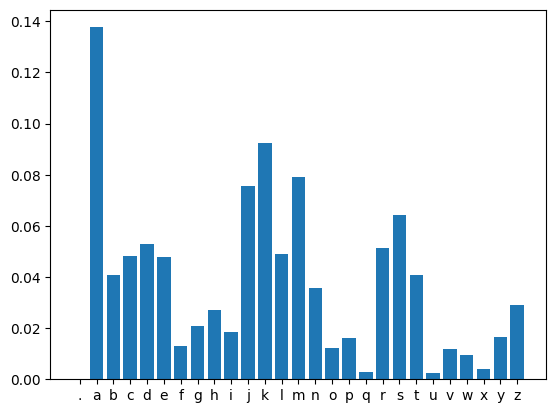

In [12]:
import matplotlib.pyplot as plt

plt.bar(["."] + list(stoi.keys())[:-1],height=p)

In [13]:
g = torch.Generator().manual_seed(43)
ix = torch.multinomial(p, num_samples=5, replacement=True, generator=g)
ix

tensor([13,  8,  3, 14, 26])

In [14]:
g = torch.Generator().manual_seed(43)

p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.2889, 0.1250, 0.5861])

In [15]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
        0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2,
        2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2,
        2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2,
        0, 2, 0, 2])

In [16]:
g = torch.Generator().manual_seed(43)

for i in range(1):
    out = []
    ix = 0

    while True:
        p = cnt_table[ix].float()
        p = p / p.sum()
        # p = torch.ones(27) / 27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        print(ix)
        if ix == 0:
            break
        out.append(itos[ix])
    print("".join(out))

18
5
14
0
ren


In [17]:
p = cnt_table[0].float() 
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0185, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

<BarContainer object of 27 artists>

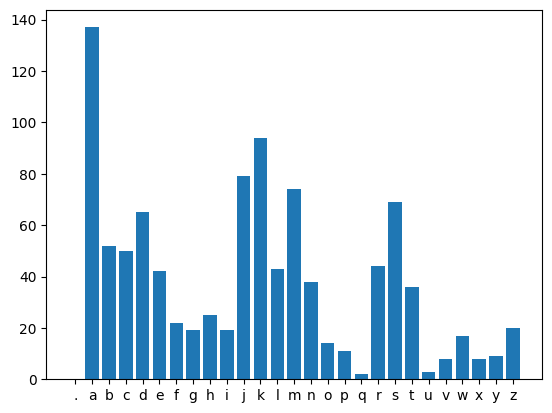

In [18]:
output = {i:0 for i in range(27)}

for i in range(1000):
    output[torch.multinomial(p, num_samples=1, replacement=True).item()] += 1

plt.bar(cnt_table_pd.index,list(output.values()))


<BarContainer object of 27 artists>

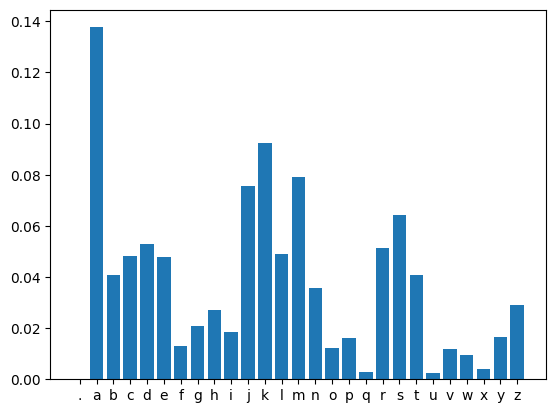

In [19]:
plt.bar(cnt_table_pd.index,p)

In [20]:
cnt_table.sum(dim=1, keepdim=True)

tensor([[32032],
        [33884],
        [ 2645],
        [ 3532],
        [ 5496],
        [20422],
        [  905],
        [ 1927],
        [ 7616],
        [17701],
        [ 2900],
        [ 5040],
        [13958],
        [ 6640],
        [18327],
        [ 7934],
        [ 1026],
        [  272],
        [12700],
        [ 8106],
        [ 5570],
        [ 3135],
        [ 2573],
        [  929],
        [  697],
        [ 9776],
        [ 2398]])

In [21]:
a = torch.tensor([[1,2,3],
                  [4,5,6]])

a2 = a.sum(dim=1,keepdim=True)
a2

tensor([[ 6],
        [15]])

In [22]:
P = (cnt_table + 1).float()
P = P / P.sum(1, keepdim=True)
P.shape

torch.Size([27, 27])

In [23]:
g = torch.Generator().manual_seed(43)

for i in range(1):
    out = []
    ix = 0

    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # print(ix)
        if ix == 0:
            break
        out.append(itos[ix])
    print("".join(out))

ren


In [24]:
log_likelihood = 0.0
for name in names[:3]:
    chs = ["."] + list(name) + ["."]
    for chs1, chs2 in zip(chs, chs[1:]):
        chs1_idx = stoi[chs1]
        chs2_idx = stoi[chs2]
        prob = P[chs1_idx, chs2_idx]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f"{chs1} {chs2} | {prob=}")
    
logloss = -log_likelihood
print(logloss)

    

. o | prob=tensor(0.0123)
o l | prob=tensor(0.0779)
l i | prob=tensor(0.1774)
i v | prob=tensor(0.0152)
v i | prob=tensor(0.3508)
i a | prob=tensor(0.1380)
a . | prob=tensor(0.1958)
. a | prob=tensor(0.1376)
a v | prob=tensor(0.0246)
v a | prob=tensor(0.2473)
a . | prob=tensor(0.1958)
. i | prob=tensor(0.0185)
i s | prob=tensor(0.0743)
s a | prob=tensor(0.1478)
a b | prob=tensor(0.0160)
b e | prob=tensor(0.2455)
e l | prob=tensor(0.1589)
l l | prob=tensor(0.0962)
l a | prob=tensor(0.1876)
a . | prob=tensor(0.1958)
tensor(47.7656)


In [25]:
X, y  = [], []

for name in ["emma"]:
    chs = ["."] + list(name) + ["."]
    for chs1, chs2 in zip(chs, chs[1:]):
        chs1_idx = stoi[chs1]
        chs2_idx = stoi[chs2]
        X.append(chs1_idx)
        y.append(chs2_idx)
X = torch.tensor(X)
y = torch.tensor(y)

X.shape, y.shape

(torch.Size([5]), torch.Size([5]))

In [26]:
import torch.nn.functional as F

X_cat = F.one_hot(X, num_classes=27).float()
y_cat = F.one_hot(y, num_classes=27).float()

X_cat

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

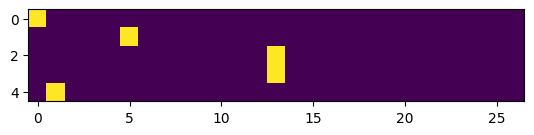

In [27]:
plt.imshow(X_cat)

In [28]:
W = torch.randn(27,27)
X_cat  @ W

tensor([[-0.5731, -0.3572,  1.0211, -0.5218, -2.0309,  0.1077, -0.2562,  0.0298,
          0.5428, -0.1724, -0.3545,  2.3607, -1.1564, -1.8966, -2.9926, -0.0600,
          2.0796, -1.4912, -0.7163,  1.4378,  1.2499, -1.5876,  0.9566, -0.7711,
         -1.0835, -0.4322, -0.7904],
        [-1.2452,  0.1766,  0.4416, -0.0958, -0.4531,  0.9375, -0.8381,  1.4655,
          2.9663, -0.2204,  0.0100, -0.5793,  1.8120, -2.0928,  1.1829,  0.0784,
         -1.2369,  2.5520, -0.1378,  0.3703, -0.2134, -1.0947,  2.5676,  1.9582,
          0.2086,  0.8568,  1.1021],
        [ 0.3596,  1.3314,  1.1257,  1.3968, -1.1317, -0.0605, -0.5533,  0.9650,
          0.7597, -0.3217, -0.2429, -0.5211,  1.3842,  0.3740,  1.2427, -0.2032,
         -0.2348,  0.2496, -0.3379, -0.7180,  0.1178, -0.5330, -0.3581,  1.3363,
         -0.6200,  1.4470,  0.3116],
        [ 0.3596,  1.3314,  1.1257,  1.3968, -1.1317, -0.0605, -0.5533,  0.9650,
          0.7597, -0.3217, -0.2429, -0.5211,  1.3842,  0.3740,  1.2427, -0.2032

In [29]:
logits = X_cat @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0128, 0.0159, 0.0629, 0.0134, 0.0030, 0.0252, 0.0175, 0.0233, 0.0390,
         0.0191, 0.0159, 0.2402, 0.0071, 0.0034, 0.0011, 0.0213, 0.1813, 0.0051,
         0.0111, 0.0954, 0.0791, 0.0046, 0.0590, 0.0105, 0.0077, 0.0147, 0.0103],
        [0.0033, 0.0136, 0.0178, 0.0104, 0.0073, 0.0292, 0.0049, 0.0494, 0.2217,
         0.0092, 0.0115, 0.0064, 0.0699, 0.0014, 0.0373, 0.0123, 0.0033, 0.1465,
         0.0099, 0.0165, 0.0092, 0.0038, 0.1488, 0.0809, 0.0141, 0.0269, 0.0344],
        [0.0309, 0.0816, 0.0664, 0.0871, 0.0069, 0.0203, 0.0124, 0.0565, 0.0461,
         0.0156, 0.0169, 0.0128, 0.0860, 0.0313, 0.0746, 0.0176, 0.0170, 0.0276,
         0.0154, 0.0105, 0.0242, 0.0126, 0.0151, 0.0820, 0.0116, 0.0916, 0.0294],
        [0.0309, 0.0816, 0.0664, 0.0871, 0.0069, 0.0203, 0.0124, 0.0565, 0.0461,
         0.0156, 0.0169, 0.0128, 0.0860, 0.0313, 0.0746, 0.0176, 0.0170, 0.0276,
         0.0154, 0.0105, 0.0242, 0.0126, 0.0151, 0.0820, 0.0116, 0.0916, 0.0294],
        [0.0226, 0.0044,

In [30]:
probs.sum(1, keepdim=True)

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

In [31]:
probs.shape

torch.Size([5, 27])

In [32]:
probs[0]

tensor([0.0128, 0.0159, 0.0629, 0.0134, 0.0030, 0.0252, 0.0175, 0.0233, 0.0390,
        0.0191, 0.0159, 0.2402, 0.0071, 0.0034, 0.0011, 0.0213, 0.1813, 0.0051,
        0.0111, 0.0954, 0.0791, 0.0046, 0.0590, 0.0105, 0.0077, 0.0147, 0.0103])

In [33]:
g = torch.Generator().manual_seed(42)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [34]:
def train_step(X, y, W, lr=0.01):
    X_cat = F.one_hot(X, num_classes=27).float()
    logits = X_cat @ W
    pseudo_counts = logits.exp()
    probs = pseudo_counts / pseudo_counts.sum(1,keepdim=True)
    loss = -probs[torch.arange(len(X)), y].log().mean()

    W.grad = None
    loss.backward()
    W.data += -lr * W.grad
    # print(loss.item())
    return loss.item()


In [35]:

for i in range(10000):
    train_step(X,y, W, 0.01)


In [36]:
X_cat = F.one_hot(X, num_classes=27).float()
logits = X_cat @ W
pseudo_counts = logits.exp()
probs = pseudo_counts / pseudo_counts.sum(1,keepdim=True)
loss = -probs[torch.arange(len(X)), y].log().mean()
# print(loss)

In [37]:
W.grad.shape


torch.Size([27, 27])

In [38]:
W.data += -0.1 * W.grad

In [39]:
loss

tensor(0.3421, grad_fn=<NegBackward0>)

In [40]:
test = torch.zeros((1,27), requires_grad=False)
test[0,13] = 1
test

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
def softmax(x):
    x = x.exp()
    return x / x.sum(1,keepdim=True)
result = test @ W
torch.set_printoptions(sci_mode=False)
softmax(result)

tensor([[0.0015, 0.4688, 0.0025, 0.0020, 0.0007, 0.0015, 0.0010, 0.0012, 0.0051,
         0.0050, 0.0047, 0.0019, 0.0017, 0.4688, 0.0011, 0.0014, 0.0050, 0.0016,
         0.0021, 0.0053, 0.0047, 0.0024, 0.0029, 0.0016, 0.0030, 0.0017, 0.0007]],
       grad_fn=<DivBackward0>)

In [42]:
itos[result.argmax().item()]

'a'

In [43]:
g = torch.Generator().manual_seed(43)

W_probs = W.exp() / W.exp().sum(1,keepdim=True)

for i in range(10):
    out = []
    ix = 0

    while True:
        p = W_probs[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # print(ix)
        if ix == 0:
            break
        out.append(itos[ix])
    print("".join(out))

emmmmminfa
emmmmma
emmmmmmmmma
emmmmahfkxsglpaf
emmma
emma
emmmma
ema
emmmarvzcpxzsqdgopxxltemmrhfma
ema


In [44]:
X, y  = [], []

for name in names:
    chs = ["."] + list(name) + ["."]
    for chs1, chs2 in zip(chs, chs[1:]):
        chs1_idx = stoi[chs1]
        chs2_idx = stoi[chs2]
        X.append(chs1_idx)
        y.append(chs2_idx)
X = torch.tensor(X)
y = torch.tensor(y)


In [52]:
W = torch.randn((27,27), requires_grad=True)
loss_values = []    
epochs = 0

In [53]:
BATCH_SIZE = 32
import random



for i in range(1000):
    batch_idxs = random.choices(list(range(len(X))),k=BATCH_SIZE)
    X_batch = X[batch_idxs]
    y_batch = y[batch_idxs]
    loss = train_step(X_batch, y_batch, W, lr=1)
    loss_values.append(loss)
    epochs += 1

loss_values

[3.664262294769287,
 3.764068365097046,
 3.9537110328674316,
 3.720690965652466,
 3.788069248199463,
 3.684039354324341,
 3.6001486778259277,
 3.300323486328125,
 3.6191978454589844,
 3.7886977195739746,
 3.4002532958984375,
 3.4248034954071045,
 3.798407554626465,
 3.4012975692749023,
 3.737128257751465,
 3.47635817527771,
 3.8355712890625,
 3.32395339012146,
 3.6136486530303955,
 3.5996646881103516,
 3.728618621826172,
 3.3586549758911133,
 3.7857775688171387,
 3.277315378189087,
 3.715944290161133,
 3.527588367462158,
 3.472651243209839,
 3.751485824584961,
 3.406973361968994,
 3.7725467681884766,
 3.3600106239318848,
 3.5754904747009277,
 3.3594284057617188,
 3.3517539501190186,
 3.4642090797424316,
 3.6075878143310547,
 3.8101301193237305,
 3.2333245277404785,
 3.6502580642700195,
 3.628504753112793,
 3.4417004585266113,
 3.191240072250366,
 3.4276602268218994,
 3.258096218109131,
 3.1907036304473877,
 3.2216362953186035,
 3.5394997596740723,
 3.269361972808838,
 3.294655084609985

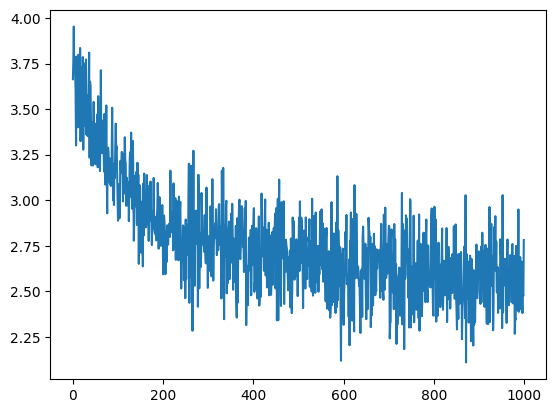

In [54]:
plt.plot(list(range(epochs)),loss_values)

In [55]:
g = torch.Generator().manual_seed(41)

W_probs = W.exp() / W.exp().sum(1,keepdim=True)

for i in range(10):
    out = []
    ix = 0

    while True:
        p = W_probs[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # print(ix)
        if ix == 0:
            break
        out.append(itos[ix])
    print("".join(out))

cerypbre
jc
miezeri
mah
ca
lanke
ligbadeai
ariynde
dilelfalexjh
tee


In [51]:
W_probs.shape

torch.Size([27, 32])